In [11]:
## Unique vs. shared estrs per tissue
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m"
    #"permuted": "gray"
}

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Heart",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}

TABLE = "/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/LR_SummaryTest_Table.tsv"


In [12]:
summary = pd.read_csv(TABLE, sep='\t')
Unique = summary.loc[summary['E.tissues']==1]
Shared = summary.loc[summary['E.tissues']>1]

Counts={}
Counts['Counts.Tissues']=['Total.eSTRs', 'Uniq.eSTRs','Shared.eSTRs','Shared.by.5+']
for T in list(COLORS.keys()):
    K = 'eSTR.%s'%SHORTEN[T]
    tot=summary.loc[summary[K]==1].shape[0]
    U = Unique.loc[Unique[K]==1].shape[0]
    S = Shared.loc[Shared[K]==1].shape[0]
    S5 = Shared.loc[(Shared[K]==1) & (Shared['E.tissues']>=5)].shape[0] #Shared by 5 tissues or more
    Counts[SHORTEN[T]]=[tot, U, S, S5]
    #
df = pd.DataFrame.from_dict(Counts)    
df = df[['Counts.Tissues']+sorted(list(SHORTEN.values()))]
df.index = df['Counts.Tissues']
del df['Counts.Tissues']
df = df.transpose()
df

Counts.Tissues,Total.eSTRs,Uniq.eSTRs,Shared.eSTRs,Shared.by.5+
Adipose.S,3596,1137,2459,1236
Adipose.V,1842,461,1381,827
Artery.A,2401,704,1697,924
Artery.T,3462,1144,2318,1129
Blood,2587,1251,1336,615
Caudate,682,221,461,278
Cerebellum,1555,678,877,441
Fibroblast,3096,1268,1828,863
Heart,1733,565,1168,613
Lung,2992,972,2020,1041


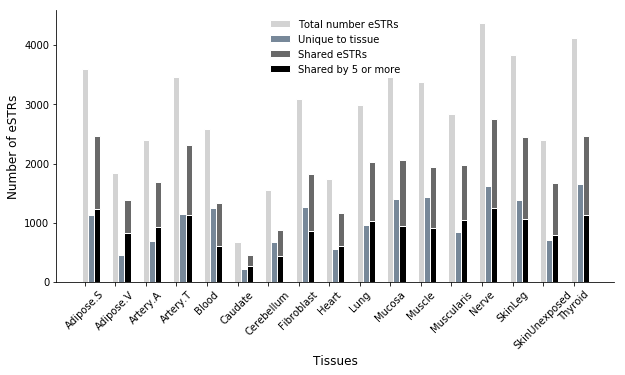

In [18]:
xvals = np.array(range(df.shape[0]))
w = 0.2
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
bars1 = ax.bar(xvals, df["Total.eSTRs"], color="lightgrey", edgecolor="white", width=w, label="Total number eSTRs")
bars2 = ax.bar(xvals+w, df["Uniq.eSTRs"], color="lightslategray", edgecolor="white", width=w, label="Unique to tissue")
bars3 = ax.bar(xvals+2*w, df["Shared.eSTRs"], color="dimgrey", edgecolor="white", width=w, label="Shared eSTRs")
bars4 = ax.bar(xvals+2*w, df["Shared.by.5+"], color="k", edgecolor="w", width=w, label="Shared by 5 or more") #xvals+3*w to separate the 5+

ax.set_xticks(xvals)
ax.set_xticklabels(list(df.index), size=10, rotation=45);
ax.set_ylabel("Number of eSTRs", size=12)
ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=10);
ax.legend(loc="upper center", frameon=False);
ax.set_xlabel("Tissues", size=12)
fig.savefig("../pdfs/eSTRs_sharing_main.pdf")
plt.show()

def autolabel(bars):
    for ax in bars:
        height = ax.get_height()
        ax.text(ax.get_x() + ax.get_width()/2., 1.05*height,'%d'% int(height), ha='center', va='bottom')
